**Trend**

In [13]:
import pandas as pd


retail_sales = pd.read_csv('us-retail-sales.csv', parse_dates=['Month'], index_col='Month').to_period('D')
retail_sales.head()

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,8475,3669,29682,31684,17984,10608
1992-04-01,9401,3527,30228,32547,18872,11630
1992-05-01,9558,3571,31677,32883,20037,12327


In [35]:
print(retail_sales.index.min())
print(retail_sales.index.max())
print(retail_sales.index.max() - retail_sales.index.min() )
print(10196 / 365)

1992-01-01
2019-12-01
<10196 * Days>
27.934246575342467


In [14]:
food_sales = retail_sales.loc['1992-01-01':'1993-12-01', 'FoodAndBeverage']
food_sales.head()

Month
1992-01-01    29589
1992-02-01    28570
1992-03-01    29682
1992-04-01    30228
1992-05-01    31677
Freq: D, Name: FoodAndBeverage, dtype: int64

In [15]:
store_sales = pd.read_csv('train.csv', dtype={'store_nbr': 'category', 'family': 'category', 'sales': 'float32',
                                              'onpromotion': 'uint64'}, parse_dates=['date'], infer_datetime_format=True)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

/var/folders/ss/8t40j75527v3c6rlj37_lltc0000gn/T/ipykernel_19585/27276428.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv('train.csv', dtype={'store_nbr': 'category', 'family': 'category', 'sales': 'float32',


[Text(0.5, 1.0, 'Us Food and Beverage Sales'),
 Text(0, 0.5, 'In millions of dollars')]

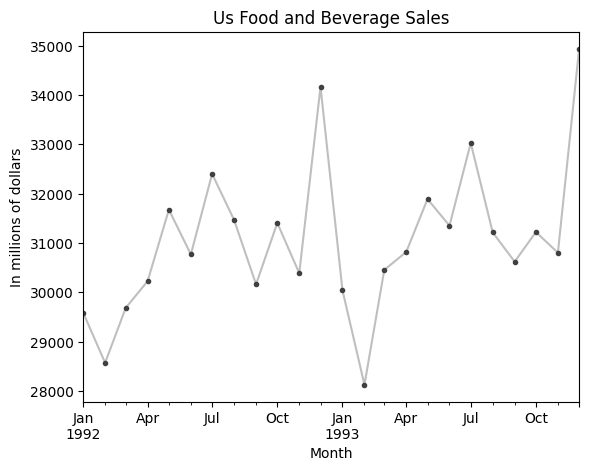

In [16]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = food_sales.plot(**plot_params)
ax.set(title='Us Food and Beverage Sales', ylabel='In millions of dollars')

Month
1992-01-01    30085.833333
1992-02-01    30416.714286
1992-03-01    30548.250000
1992-04-01    30505.333333
1992-05-01    30595.500000
1992-06-01    30576.636364
1992-07-01    30876.083333
1992-08-01    30913.583333
1992-09-01    30876.583333
1992-10-01    30941.000000
1992-11-01    30990.333333
1992-12-01    31008.166667
1993-01-01    31056.750000
1993-02-01    31109.000000
1993-03-01    31087.833333
1993-04-01    31126.166667
1993-05-01    31110.833333
1993-06-01    31145.416667
1993-07-01    31209.666667
1993-08-01    31316.090909
1993-09-01    31635.100000
1993-10-01    31766.222222
1993-11-01    31884.500000
1993-12-01    31883.571429
Freq: D, Name: FoodAndBeverage, dtype: float64


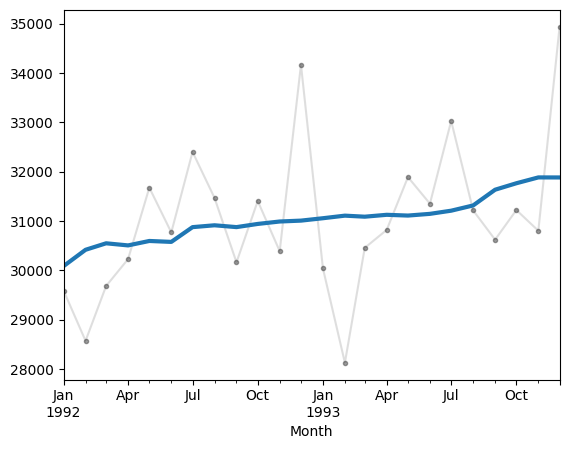

In [17]:
# rolling window calculation (last 12 periods)
trend = food_sales.rolling(
  window=12,
  center=True,
  min_periods=6
).mean()
print(trend)
ax = food_sales.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

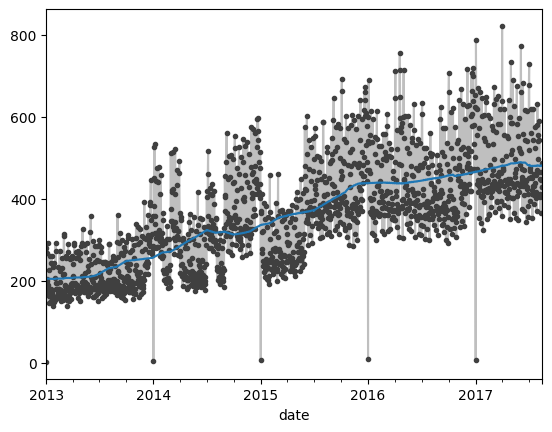

In [18]:
# calculate mean over the last 365 days in the average serie
trend = average_sales.rolling(
  window=365,
  center=True,
  min_periods=183,
).mean()
ax = average_sales.plot(**plot_params)
ax = trend.plot(ax=ax)

In [19]:
from statsmodels.tsa.deterministic import DeterministicProcess
y = average_sales.copy()
dp = DeterministicProcess(
  average_sales.index,
  constant=True,
  order=1,
  drop=True,
)
X = dp.in_sample()
X.head()

,const,trend
date,,
2013-01-01,1.0,1.0
2013-01-02,1.0,2.0
2013-01-03,1.0,3.0
2013-01-04,1.0,4.0
2013-01-05,1.0,5.0
